In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [220]:
data=pd.read_csv('../data/AdSmartABdata.csv')
data.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2243,497dadfa-f61c-4065-a78f-1b8169218308,exposed,2020-07-10,7,Generic Smartphone,6,Chrome Mobile,0,0
5225,a5a10832-6be2-4dd8-afe8-551276fcc921,exposed,2020-07-10,1,Generic Smartphone,6,Chrome Mobile,0,0
5965,bd3f75f3-850f-4429-875d-73c7916dd4a0,control,2020-07-08,16,LG-$2,6,Chrome Mobile,0,0
7947,fb9542cb-7e31-4886-9ed2-e9d164552455,exposed,2020-07-08,4,Generic Smartphone,6,Chrome Mobile,0,0
1806,3bfebf58-e963-473c-81b0-8bbddf5ac471,exposed,2020-07-06,3,Generic Smartphone,6,Chrome Mobile,0,1


In [221]:
platforms = data['platform_os'].unique()

In [222]:
browsers = data['browser'].unique()
browsers

array(['Chrome Mobile', 'Chrome Mobile WebView', 'Facebook',
       'Mobile Safari', 'Chrome Mobile iOS', 'Samsung Internet',
       'Mobile Safari UI/WKWebView', 'Chrome', 'Opera Mini',
       'Edge Mobile', 'Android', 'Pinterest', 'Opera Mobile',
       'Firefox Mobile', 'Puffin'], dtype=object)

In [223]:
data['clicked'] = data['yes']+data['no']
data = data[data['clicked'] == 1]

In [224]:
chrome = data
chrome.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
1497,31248f44-f54d-4dc9-b0bc-b154d864d1a5,control,2020-07-10,9,Generic Smartphone,6,Chrome Mobile,1,0,1
5322,a89b65d6-4350-4862-9292-12cbafe149d1,control,2020-07-10,11,Generic Smartphone,6,Chrome Mobile,0,1,1
2998,6097d7ca-c6ed-43ea-a127-a1c158e551ae,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1,0,1
6036,bfaa07e5-99ed-4975-b941-057d91629a61,exposed,2020-07-08,16,Samsung SM-A202F,6,Chrome Mobile WebView,0,1,1
6072,c0cf2c7f-29e3-4e0d-a9b5-353039067a09,exposed,2020-07-04,2,ANE-LX1,6,Facebook,1,0,1


In [225]:
os6 = data[data['platform_os'] == 6]
os6.sample(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
6307,c86909ec-fbba-45f6-b3f9-ed145d4f9349,exposed,2020-07-05,12,Generic Smartphone,6,Chrome Mobile,1,0,1
4553,9125796f-3306-4a80-a96f-f9fd5445d56f,exposed,2020-07-06,1,Generic Smartphone,6,Chrome Mobile,0,1,1
4834,9a1735fe-3cbf-41c1-ba89-a57a6e2d00ba,exposed,2020-07-08,18,Nokia undefined$2$3,6,Chrome Mobile,1,0,1
4545,90e88134-b9bc-4655-99d1-3f73b124c1bc,exposed,2020-07-10,15,Generic Smartphone,6,Chrome Mobile,1,0,1
7792,f742b01c-8bde-49bf-b2fe-fbe54e7e0092,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0,1


In [226]:
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    d = df[[x_col]].groupby(x_col).agg({x_col:'count'}).rename(columns = {x_col : 'count'}).reset_index()
    d = d.sort_values(by="count", ascending=False)
    plt.figure(figsize=(12, 7))
    sns.barplot(data = d, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

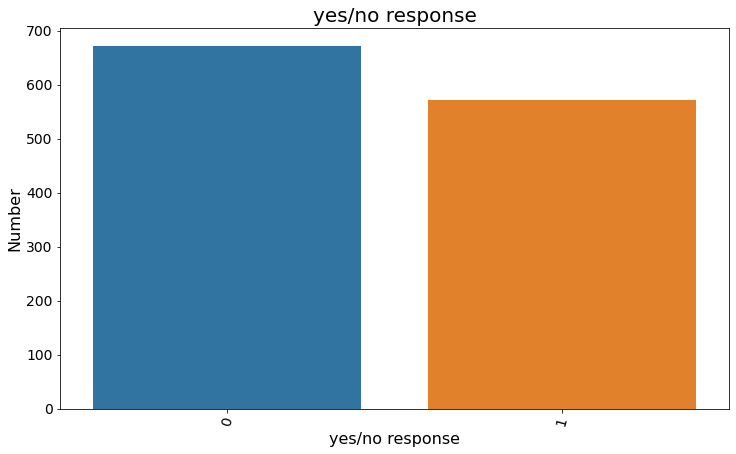

In [227]:
plot_bar(chrome, 'yes', 'count', 'yes/no response', 'yes/no response', 'Number')

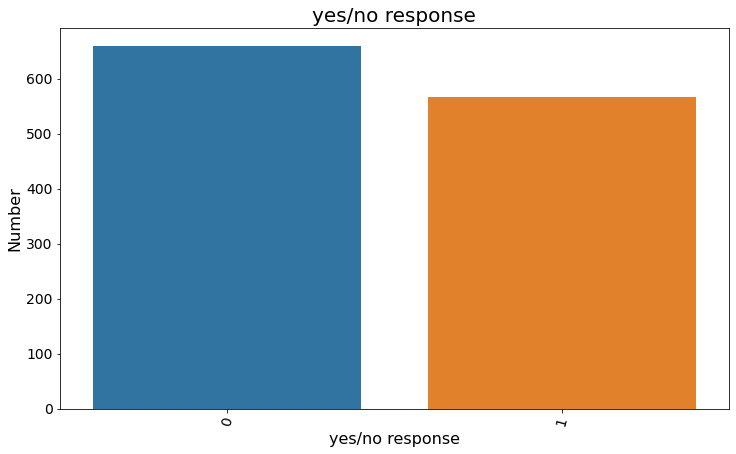

In [228]:
plot_bar(os6, 'yes', 'count', 'yes/no response', 'yes/no response', 'Number')

In [229]:
chrome.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,clicked
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1,1


In [230]:

chrome_data = chrome[['experiment','date', 'hour', 'device_make', 'platform_os', 'yes']]

In [231]:
chrome.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
clicked        0
dtype: int64

In [232]:
x = chrome_data[['experiment','date', 'hour', 'device_make', 'platform_os']]
y = chrome_data[['yes']].values
x.shape, y.shape

((1243, 5), (1243, 1))

In [233]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x['experiment'] = le.fit_transform(x['experiment'])
x['device_make'] = le.fit_transform(x['device_make'])
x['date'] = le.fit_transform(x['date'])
x.head()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,experiment,date,hour,device_make,platform_os
2,1,2,2,4,6
16,1,1,16,13,6
20,1,3,8,13,6
23,0,5,4,43,6
27,0,0,15,13,6


### Train Test split

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=25)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=25)

### Scaling

In [239]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

### Logistic Regression

In [242]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5180722891566265

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

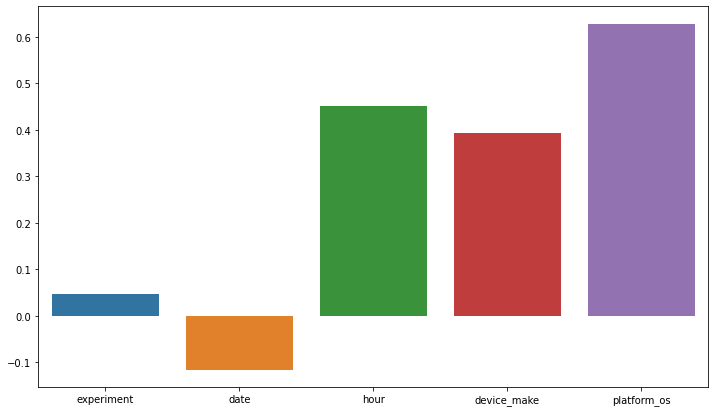

In [243]:
plt.figure(figsize=(12,7))
sns.barplot(x.columns, reg.coef_[0])